# 2021 Parteilose

In [1]:
import pandas as pd
import numpy as np
import cleandata as cd
import matplotlib

In [2]:
df_raw = pd.read_csv('../data/Gemeinde_Exekutive - daten.csv')
df_bev_raw = pd.read_csv('../data/KANTON_ZUERICH_bevoelkerung_1jahresklassen.csv', sep=';')

## Clean Data

In [3]:
df_raw = cd.clean(df_raw)

Jahrgänge nicht zugeordnet: 15
Partei nicht zugeordnet: 9
Keine Jahrgänge: 21


In [4]:
# Define which ones are cities (not Gemeinden)
stadtrat = ['Adliswil', 'Affoltern am Albis', 'Bülach', 'Dietikon', 'Dübendorf', 'Illnau-Effretikon', 'Kloten', 'Opfikon', 'Schlieren', 'Uster', 'Wädenswil', 'Wetzikon', 'Winterthur', 'Zürich']

df_raw['type'] = 'land'
df_raw.loc[df_raw.Gemeinde.isin(stadtrat), 'type'] = 'stadt'

# Parteilose pro Einwohner berechnen

In [5]:
# Clean Bevölkerung
df_bev = df_bev_raw[df_bev_raw.JAHR == 2020].copy()

df_bev = df_bev.groupby('GEMEINDE').agg({'ANZAHL_PERSONEN': 'sum'}).reset_index()

df_bev['GEMEINDE'] = df_bev['GEMEINDE'].str.replace('a.A.', 'am Albis', regex=False)
df_bev['GEMEINDE'] = df_bev['GEMEINDE'].str.replace('a.I.', 'am Irchel', regex=False)
df_bev['GEMEINDE'] = df_bev['GEMEINDE'].str.replace('a.d.Th.', 'an der Thur', regex=False)
df_bev['GEMEINDE'] = df_bev['GEMEINDE'].str.replace('a.S.', 'am See', regex=False)
df_bev['GEMEINDE'] = df_bev['GEMEINDE'].str.replace('a.d.L.', 'an der Limmat', regex=False)

In [6]:
df = df_raw.copy()

df = pd.pivot_table(df, index=['Gemeinde', 'type'], columns='partei_c', values='Name', aggfunc='count').reset_index()
df = df.fillna(0)
df['total'] = df.sum(axis=1)
df['parteilos%'] = (100 / df['total'] * df['parteilos'])

# Remove (ZH)
df['Gemeinde'] = df['Gemeinde'].str.replace(' (ZH)', '', regex=False)

# Join that shit!
df = df.merge(df_bev, how='left', left_on='Gemeinde', right_on='GEMEINDE')

<AxesSubplot:xlabel='parteilos%', ylabel='ANZAHL_PERSONEN'>

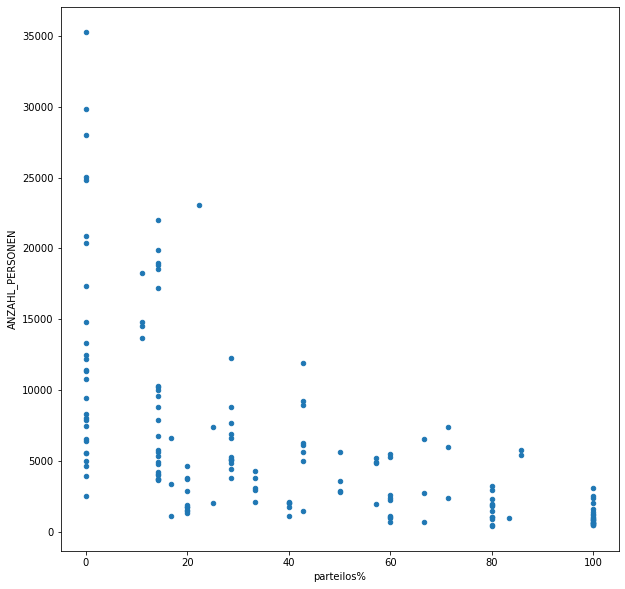

In [7]:
df[df.ANZAHL_PERSONEN < 100000].plot.scatter(x='parteilos%', y='ANZAHL_PERSONEN', figsize=(10, 10))

<AxesSubplot:xlabel='parteilos%', ylabel='ANZAHL_PERSONEN'>

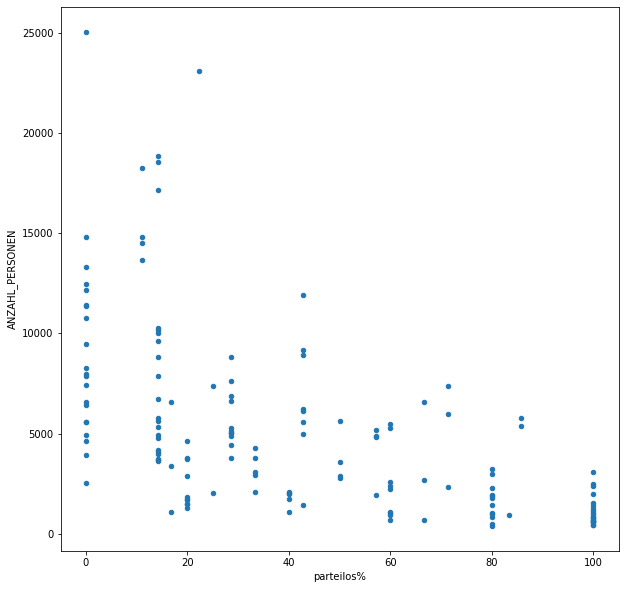

In [8]:
df[df.type == 'land'].plot.scatter(x='parteilos%', y='ANZAHL_PERSONEN', figsize=(10, 10))

In [11]:
df.sort_values('parteilos%', ascending=False).head(20)

,Gemeinde,type,al,bdp,cvp,edu,evp,fdp,glp,grüne,parteilos,sp,svp,vacant,verschiedene,total,parteilos%,GEMEINDE,ANZAHL_PERSONEN
31,Dättlikon,land,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,6.0,100.000000,Dättlikon,799
12,Berg am Irchel,land,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,100.000000,Berg am Irchel,595
27,Dorf,land,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,100.000000,Dorf,665
146,Weiach,land,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,100.000000,Weiach,1987
118,Schlatt,land,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,100.000000,Schlatt,778
119,Schleinikon,land,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,100.000000,Schleinikon,856
37,Ellikon an der Thur,land,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,100.000000,Ellikon an der Thur,935
122,Schöfflisdorf,land,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,100.000000,Schöfflisdorf,1394
43,Fischenthal,land,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,100.000000,Fischenthal,2494
18,Buch am Irchel,land,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,100.000000,Buch am Irchel,1022


In [13]:
len(df[df['parteilos%'] == 100])

19